# Exercise 2


Phan Bá Đức - 22120071

---

# Hoeffding Inequality
## 1

In [1]:
import numpy as np
import random

# Function to simulate coin toss
def toss_coin(num_coins, num_trials, probability=0.5):
    # Return the number of heads in 10 trials for each coin
    return np.random.binomial(num_trials, probability, num_coins)

In [2]:
num_simulations = 100000
num_coins = 1000
num_trials = 10

# Simulation
results_all = np.array([toss_coin(num_coins, num_trials) for _ in range(num_simulations)]) / num_trials

# Calculate the odds of heads for coins
v_1 = results_all[:, 0] 
v_min = np.min(results_all, axis=1)
v_rand = np.array([random.choice(results) for results in results_all])

# Print the average results for the 3 cases
print("v_1:", v_1.mean())
print("v_min:", v_min.mean())
print("v_rand:", v_rand.mean())

v_1: 0.5003850000000001
v_min: 0.037313
v_rand: 0.49894700000000003


Question 1:

**We see that the result is closest to answer [b] 0.01**

## 2

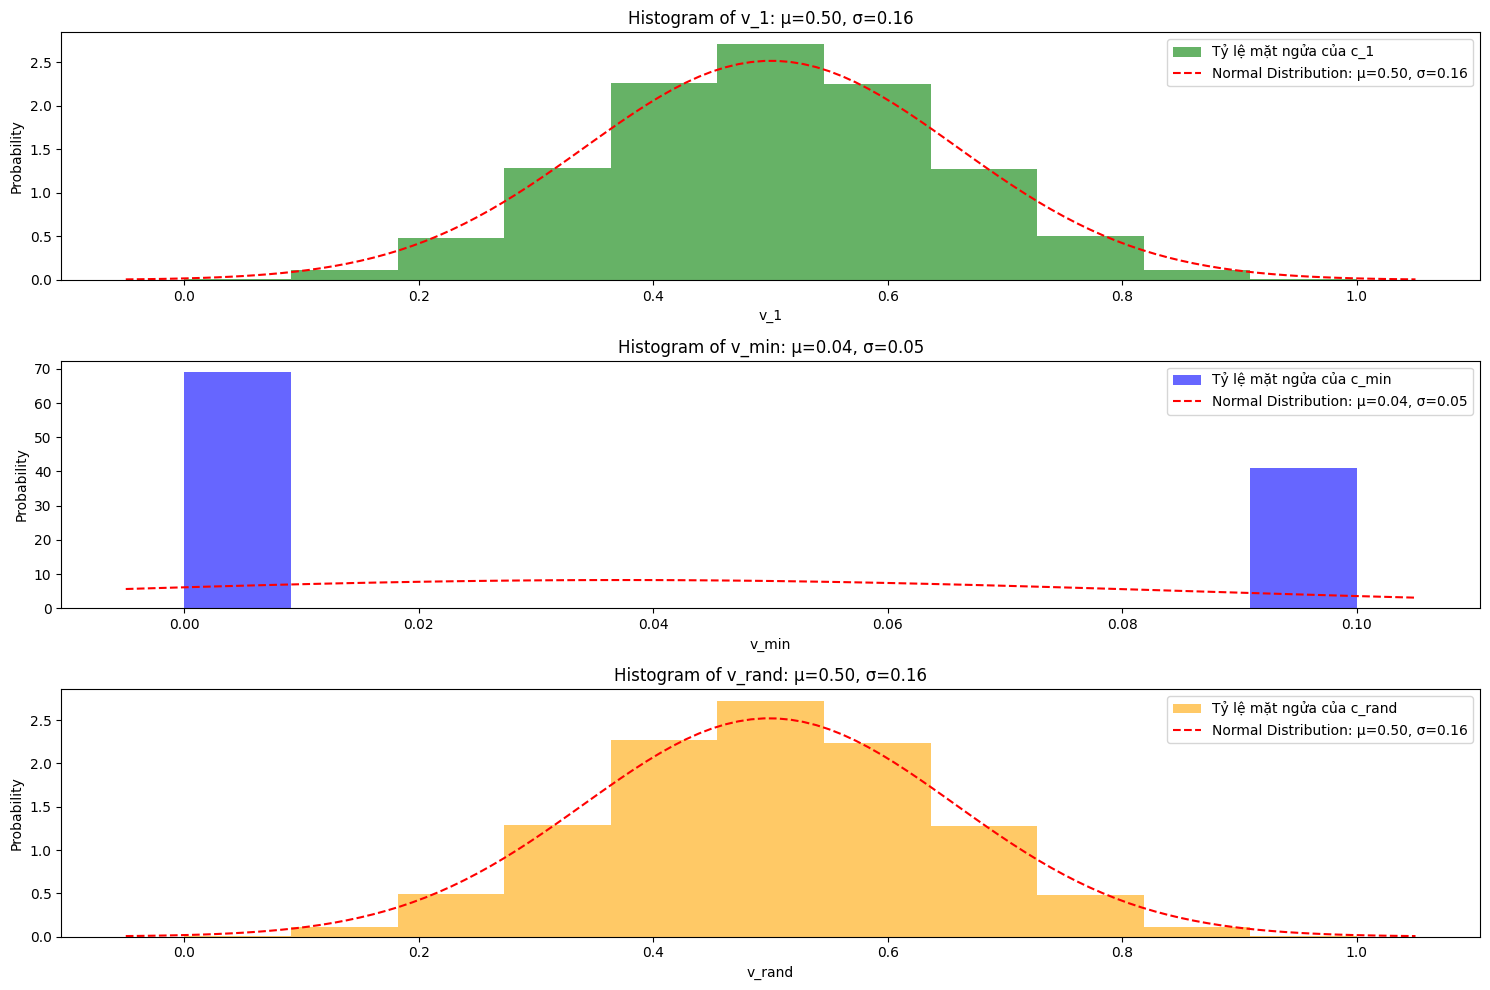

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate the average and standard deviation of the head ratio
mu_v1 = np.mean(v_1)
sigma_v1 = np.std(v_1)

mu_vmin = np.mean(v_min)
sigma_vmin = np.std(v_min)

mu_vrand = np.mean(v_rand)
sigma_vrand = np.std(v_rand)

# Draw a histogram for the heads ratio of v_1, v_min and v_rand
plt.figure(figsize=(15, 10))

# Draw histogram for v_1
plt.subplot(3, 1, 1)
plt.hist(v_1, bins=11, alpha=0.6, label='Tỷ lệ mặt ngửa của c_1', density=True, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_v1, sigma_v1)
plt.plot(x, p, 'r--', label=f'Normal Distribution: μ={mu_v1:.2f}, σ={sigma_v1:.2f}')
plt.title(f"Histogram of v_1: μ={mu_v1:.2f}, σ={sigma_v1:.2f}")
plt.xlabel('v_1')
plt.ylabel('Probability')
plt.legend()

# Draw histogram for v_min
plt.subplot(3, 1, 2)
plt.hist(v_min, bins=11, alpha=0.6, label='Tỷ lệ mặt ngửa của c_min', density=True, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_vmin, sigma_vmin)
plt.plot(x, p, 'r--', label=f'Normal Distribution: μ={mu_vmin:.2f}, σ={sigma_vmin:.2f}')
plt.title(f"Histogram of v_min: μ={mu_vmin:.2f}, σ={sigma_vmin:.2f}")
plt.xlabel('v_min')
plt.ylabel('Probability')
plt.legend()

# Draw histogram for v_rand
plt.subplot(3, 1, 3)
plt.hist(v_rand, bins=11, alpha=0.6, label='Tỷ lệ mặt ngửa của c_rand', density=True, color='orange')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_vrand, sigma_vrand)
plt.plot(x, p, 'r--', label=f'Normal Distribution: μ={mu_vrand:.2f}, σ={sigma_vrand:.2f}')
plt.title(f"Histogram of v_rand: μ={mu_vrand:.2f}, σ={sigma_vrand:.2f}")
plt.xlabel('v_rand')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

Question 2:

### Analysis of c_1 and c_rand:
- Both distributions are centered around 0.5, the expected value for a fair coin.
- The standard deviations for both `v_1` and `v_rand` are small, indicating small deviations from the expected value.
- Since both distributions are close to the expected value, they satisfy the Hoeffding Inequality.

### Analysis of c_min:
- The distribution of `c_min` is skewed, mostly concentrated at low values (close to 0).
- The deviation from the expected value is larger for `v_min`, indicating higher variance.
- `v_min` does not satisfy the Hoeffding Inequality due to the large deviation from the expected value.

### Conclusion:
- `c_1` and `c_rand` satisfy the Hoeffding Inequality.
- `c_min` does not satisfy the Hoeffding Inequality.

### Final Answer:
- **[d] c_1 and c_rand**


---

# Error and Noise
## 3
Question 3:

We want to calculate the probability that  h(x)  makes an error when approximating  y . The error occurs when $ h(x) \neq y $. There are two ways this can happen:

1. **Case 1**: $ h(x) \neq f(x) $ and $ f(x) = y $
2. **Case 2**: $ h(x) = f(x) $ and $ f(x) \neq y $


- **Case 1**: The probability of $ h(x) \neq f(x) $ and f(x) = y is

$$
P(h(x) \neq f(x) \land f(x) = y) = \mu \cdot \lambda
$$

- **Case 2**: The probability of h(x) = f(x) and $f(x) \neq y$ is

$$
P(h(x) = f(x) \land f(x) \neq y) = (1 - \mu) \cdot (1 - \lambda)
$$

### Total Error Probability

The total probability that $h(x) \neq y$ is the sum of the probabilities of both cases:

$$
P(h(x) \neq y) = P(h(x) \neq f(x) \land f(x) = y) + P(h(x) = f(x) \land f(x) \neq y)
$$


$$
P(h(x) \neq y) = \mu \cdot \lambda + (1 - \mu) \cdot (1 - \lambda)
$$


$$
P(h(x) \neq y) = \mu \lambda + (1 - \mu)(1 - \lambda)
$$

**Thus, the answer is [e] (1 - μ) * (1 - λ) + μ * λ**




## 4
Question 4:

### 1. Consider $P(h(x) \neq y)$

$$
P(h(x) \neq y) = \mu \lambda + (1 - \mu)(1 - \lambda)
$$

$$
P(h(x) \neq y) = \mu \lambda + (1 - \mu) - (1 - \mu) \lambda
$$

$$
P(h(x) \neq y) = \mu \lambda + 1 - \mu - \lambda + \mu \lambda
$$

$$
P(h(x) \neq y) = \mu (2 \lambda - 1) + 1 - \lambda
$$

To ensure that \( P(h(x) \neq y) \) is independent of \( \mu \), the coefficient of \( \mu \) in the expression must be zero. Therefore:

$$
2 \lambda - 1 = 0
$$

Solving this equation:

$$
\lambda = \frac{1}{2} = 0.5 (*)
$$


### Consider $P(h(x) = y)$

Now, we will calculate the probability that \( h(x) = y \). We know that:

$$
P(h(x) = y) = 1 - P(h(x) \neq y)
$$

$$
P(h(x) = y) = 1 - \left( \mu \lambda + (1 - \mu)(1 - \lambda) \right)
$$

$$
P(h(x) = y) = 1 - \mu \lambda - (1 - \mu)(1 - \lambda)
$$

$$
P(h(x) = y) = 1 - \mu \lambda - 1 + \lambda + \mu - \mu \lambda
$$

$$
P(h(x) = y) = \mu (1 - 2\lambda) + \lambda
$$

To ensure that \( P(h(x) = y) \) is independent of \( \mu \), the coefficient of \( \mu \) in the expression must be zero. Therefore:

$$
1 - 2\lambda = 0
$$

Solving this equation:

$$
\lambda = \frac{1}{2} = 0.5 (**)
$$

### Conclusion:

From (*) and (**), we conclude that the correct answer is: **[b] 0.5**


---
# Linear Regression

In [4]:
import numpy as np

In [5]:
def generate_target_w():
    """
    Generates target_w from two random, uniformly distributed points in [-1, 1] x [-1, 1].
    
    Returns
    -------
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    """
    # Generate two points from a uniform distribution over [-1, 1]x[-1, 1]
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)
    # Compute the target W from these two points
    target_w = np.array([p1[1] * p2[0] - p1[0] * p2[1], p2[1] - p1[1], p1[0] - p2[0]]).reshape((-1, 1))
    
    return target_w

In [6]:
def generate_data(N, target_w):
    """
    Generates a data set by generating random inputs and then using target_w to generate the 
    corresponding outputs.
    
    Parameters
    ----------
    N : int
        The number of examples.
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.        
    """
    X = np.random.uniform(-1, 1, (N, 2))
    X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
    Y = np.sign(np.dot(X, target_w))
    
    return X, Y

In [7]:
def linear_regression_for_classification(X, Y):
    """
    Computes the linear regression solution for the classification problem.
    
    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.        
    
    Returns
    -------
    w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    """
    # Compute the pseudo-inverse of X
    X_pseudo_inv = np.linalg.pinv(X)
    
    # Compute the weights using the pseudo-inverse and Y
    w = np.dot(X_pseudo_inv, Y)
    
    return w


def compute_error(X, Y, w):
    """
    Computes the error of the linear regression solution.
    
    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.        
    w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    
    Returns
    -------
    error : float
        The fraction of misclassified examples.
    """
    # Compute the predictions using the weights w
    Y_pred = np.sign(np.dot(X, w))
    
    # Compute the error as the fraction of misclassified examples
    error = np.mean(Y_pred != Y)
    
    return error

In [8]:
def main(N):
    """
    Parameters
    ----------
    N : int
        The number of training examples.
    """
    num_runs = 1000

    avg_E_out = 0.0 
    avg_E_in = 0.0 
    
    for r in range(num_runs):
        # Generate target_w
        target_w = generate_target_w()
        
        # Generate training set
        X, Y = generate_data(N, target_w)
        # Run PLA to pick g
        w = linear_regression_for_classification(X, Y)
        # Generate test set
        X_test, Y_test = generate_data(10000, target_w)
        
        # Test g
        E_in = compute_error(X, Y, w)
        E_out = compute_error(X_test, Y_test, w)
        
        # Update average values
        avg_E_in += (E_in * 1.0 / num_runs)
        avg_E_out += (E_out * 1.0 / num_runs)
    
    # Print results
    print(f"Average E_in: {avg_E_in:.4f}")
    print(f"Average E_out: {avg_E_out:.4f}")

In [9]:
main(100)

Average E_in: 0.0386
Average E_out: 0.0485


Question 5: We see that the result is closest to answer [c] 0.01

Question 6: We see that the result is closest to answer [c] 0.01

In [10]:
def run_PLA(X, Y, w):
    """
    Runs PLA.
    
    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.
        
    w : numpy array, shape (3, 1)
        The vector of parameters of g.
    Returns
    -------
    w : numpy array, shape (3, 1) 
        The vector of parameters of g.
    num_iterations : int
        The number of iterations PLA takes to converge.
    """
    
    # Initialize iteration counter to track the number of iterations
    iteration = 0
    
    # N is the number of samples, d is the number of features (including bias term)
    N = X.shape[0]
    d = X.shape[1]

    # Loop until all samples are correctly classified (no errors)
    while True:
        errors = 0  # Count the number of errors in this iteration
        
        # Shuffle the dataset for random sampling (helps to avoid cycles in learning)
        mix_id = np.random.permutation(N)
        
        # Go through each training sample
        for i in range(N):
            # Get the i-th input vector x and corresponding label y
            x, y = X[mix_id[i]].reshape(d, 1), Y[mix_id[i]]
            
            # If the current prediction (sign of w.T * x) doesn't match the true label, update weights
            if np.sign(np.dot(w.T, x)) != y:
                w += y * x  # Update weights: w = w + y * x
                errors += 1  # Increment error counter
                iteration += 1  # Increment iteration counter
        
        # If no errors were made, stop the algorithm (convergence reached)
        if errors == 0:
            break
    
    # Return the final weights and the number of iterations taken
    return w, iteration

In [11]:
def main_PLA(N):
    """
    Parameters
    ----------
    N : int
        The number of training examples.
    """
    num_runs = 1000

    avg_num_iterations = 0.0 # The average number of iterations PLA takes to converge
    avg_test_err = 0.0 # The average test error of g - the final hypothesis picked by PLA
    
    for r in range(num_runs):
        # Generate target_w
        target_w = generate_target_w()
        
        # Generate training set
        X, Y = generate_data(N, target_w)

        # Run PLA to pick g
        w = linear_regression_for_classification(X, Y)

        # Run PLA to pick g
        w, num_iterations = run_PLA(X, Y, w)

        # Generate test set
        X_test, Y_test = generate_data(10000, target_w)
        
        # Test g
        test_err = np.mean(np.sign(np.dot(X_test, w)) != Y_test)
        
        # Update average values
        avg_num_iterations += (num_iterations * 1.0 / num_runs)
        avg_test_err += (test_err * 1.0 / num_runs)
    
    # Print results
    print('avg_num_iterations = %f' % (avg_num_iterations))
    print('avg_test_err = %f' % (avg_test_err))

In [12]:
main_PLA(10)

avg_num_iterations = 3.709000
avg_test_err = 0.099249


Question 7: We see that the result is closest to answer [a] 1

# Nonlinear Transformation

In [13]:
def f(x):
    return np.sign(x[:,1]**2 + x[:,2]**2 - 0.6)

def generate_data(N):
    """
    Generates a data set by generating random inputs and then using target_w to generate the 
    corresponding outputs.
    
    Parameters
    ----------
    N : int
        The number of examples.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    Y : numpy array, shape (N, 1)
        The vector of outputs.        
    """
    # print("Generating data...")
    X = np.random.uniform(-1, 1, (N, 2))
    X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
    Y = f(X)
    
    random_indices = np.random.choice(N, N // 10, replace=False)
    Y[random_indices] = -Y[random_indices]  # Flip the labels for 10% of the data
    
    return X, Y

In [14]:
def main_nonlinear(N):
    num_runs = 1000
    avg_E_in = 0.0

    for r in range(num_runs):
        # Generate training set
        X, Y = generate_data(N)
        
        # Run PLA to pick g
        w = linear_regression_for_classification(X, Y)
        
        # Test g
        E_in = compute_error(X, Y, w)
        
        # Update average values
        avg_E_in += (E_in * 1.0 / num_runs)
        
    # Print results
    print(f"Average E_in: {avg_E_in:.4f}")

In [15]:
main_nonlinear(1000)

Average E_in: 0.5057


Question 8: We see that the result is closest to answer [d] 0.5

In [16]:
def transform(x):
    z = np.zeros((x.shape[0], 6))
    z[:, 0] = 1.0
    z[:, 1] = x[:, 1]
    z[:, 2] = x[:, 2]
    z[:, 3] = x[:, 1] * x[:, 2]
    z[:, 4] = x[:, 1]**2
    z[:, 5] = x[:, 2]**2
    return z

X, Y = generate_data(1000)
Z = transform(X)
w = linear_regression_for_classification(Z, Y)

print("w:", w)


w: [-1.01280628  0.06652738 -0.02458567  0.10750748  1.58220312  1.56477999]


Question 9: We see that the weights w are closest to (-1, -0.05, 0.08, 0.13, 1.5, 1.5)

so we choose answer **[A] $
g(x_1, x_2) = \text{sign}\left( -1 - 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5x_2^2 \right)
$**


In [17]:
def main_nonlinear_transformed(N):

    num_runs = 1000
    avg_E_out = 0.0

    average_w = np.zeros(6)

    for r in range(num_runs):
        # Generate training set
        X, Y = generate_data(N)
        Z = transform(X)

        # Run PLA to pick g
        w = linear_regression_for_classification(Z, Y)
        average_w += (w.flatten() * 1.0 / num_runs)

        X_test, Y_test = generate_data(10000)
        Z_test = transform(X_test)
        # Test g
        E_out = compute_error(Z_test, Y_test, w)
        
        # Update average values
        avg_E_out += (E_out * 1.0 / num_runs)
        
    # Print results
    print(f"Average E_out: {avg_E_out:.4f}")

In [18]:
main_nonlinear_transformed(1000)

Average E_out: 0.1261


Quetion 10: We see that the result is closest to answer [b] 0.1